***ANALYSIS OF PALMER PENGUINS DATA.***

In [2]:
# Import Libraries
import numpy as np 
import pandas as pd 
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns






In [3]:
# Read file path
filepath='/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv'
df= pd.read_csv(filepath)

In [4]:
# Analyse the data
df.head(5)
# There are many null values and also the categorial variables which have to be processed.


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
# Converted the textual to numerics
# Applied Label encoding

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['species'] = labelencoder.fit_transform(df['species'])
df['island']=labelencoder.fit_transform(df['island'])

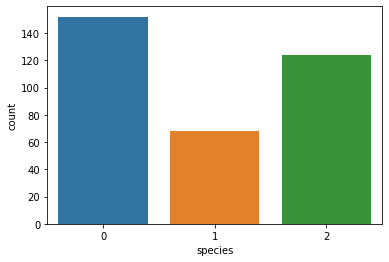

In [13]:
# Countplot check for the balancing of the data.
sns.countplot(df['species'])

In [9]:

# To check whether the data has any null values. Need to refine the data
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [10]:
# Used the mean to fill the null values.
df.fillna(df.mean(),inplace=True)

In [11]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,MALE
1,0,2,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,0,2,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,0,2,43.92193,17.15117,200.915205,4201.754386,NaN
4,0,2,36.70000,19.30000,193.000000,3450.000000,FEMALE


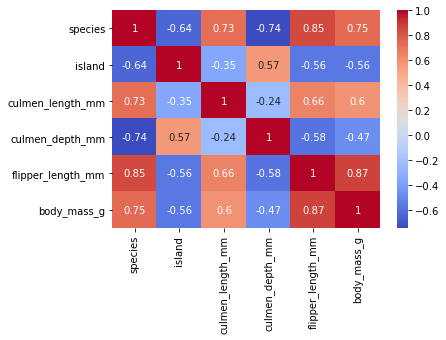

In [22]:
# To analyse the correlation among the variables 
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
# There seems to be high correlation between flipper length and bodymass

In [12]:
# Feature selection
# Did one hot encoding for categorial variables


features=['island','culmen_depth_mm','culmen_length_mm','flipper_length_mm','body_mass_g',]
y=df['species']
X=df[features]
#X=pd.get_dummies(X,columns=['island'])
y=pd.get_dummies(y)




In [15]:
y

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
339,0,0,1
340,0,0,1
341,0,0,1
342,0,0,1


In [16]:
# Checking the balance of the dataset
# The data is balanced. Wont apply undersampling.
df['species'].value_counts()



0    152
2    124
1     68
Name: species, dtype: int64

In [17]:
# Checking the Baseline Accuracy
#Aim is to beat the baseline accuracy in training the model
152/(152+124+68)

0.4418604651162791

**DATA VISUALISATION**

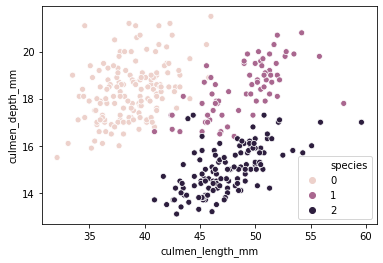

In [18]:

sns.scatterplot(x=df['culmen_length_mm'],y=df['culmen_depth_mm'],hue=df['species'])


# From the plot we can visualize that the Adelie species tend to have shorter beaks but are very thick
# It can be one of their distinguishing feature.

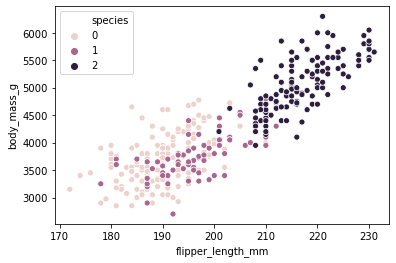

In [37]:
sns.scatterplot(x=df['flipper_length_mm'],y=df['body_mass_g'],hue=df['species'])
# Gentoo species stands out but it can be also seen here that body mass and filp length are highly correlated.


Text(0.5, 1.0, 'Palmer Heroes')

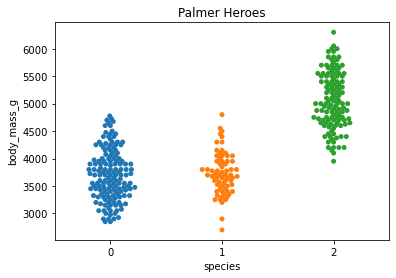

In [19]:
sns.swarmplot(x='species',y='body_mass_g',data=df)
plt.title('Palmer Heroes')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


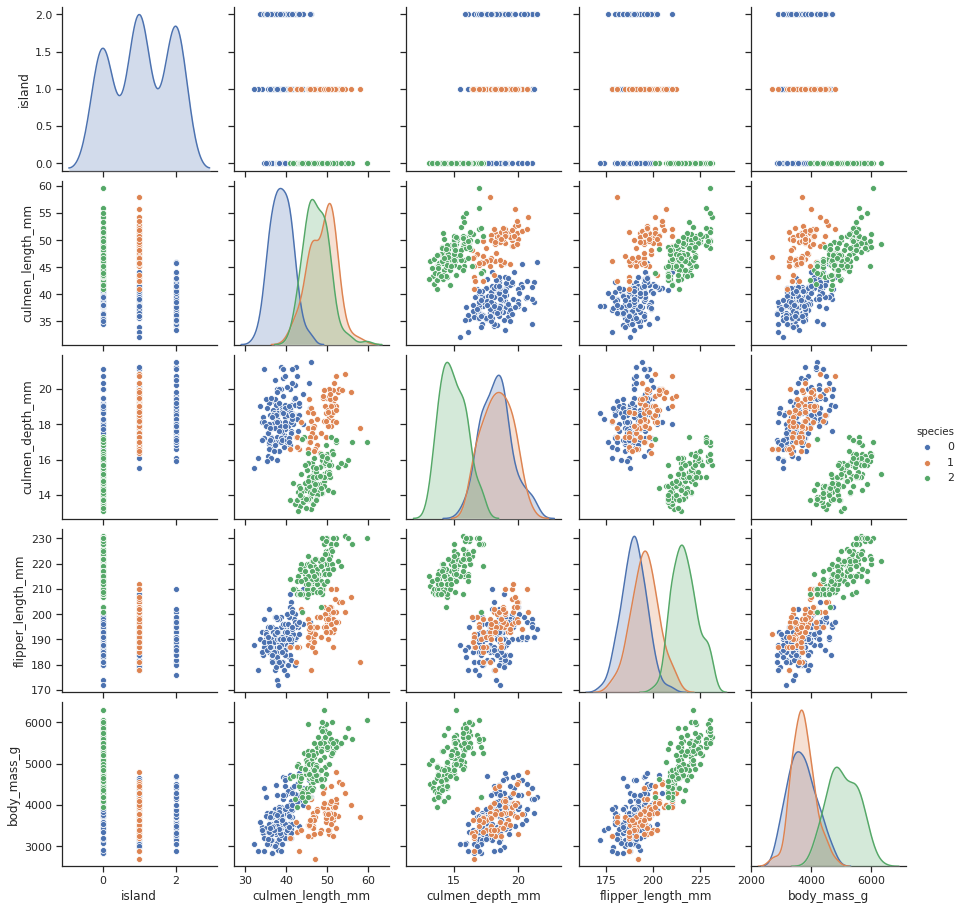

In [39]:
sns.set(style="ticks",color_codes=True)
sns.pairplot(data=df,hue='species')
# EDA with a pairplot to visualize



In [40]:
df.describe()

# Scaling should be done to feed into algos like KNN

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.918605,0.662791,43.921930,17.151170,200.915205,4201.754386
std,0.893320,0.726194,5.443643,1.969027,14.020657,799.613058
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000
25%,0.000000,0.000000,39.275000,15.600000,190.000000,3550.000000
50%,1.000000,1.000000,44.250000,17.300000,197.000000,4050.000000
75%,2.000000,1.000000,48.500000,18.700000,213.000000,4750.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000


In [20]:
# Standard Scaler is used here because the body mass index and the flipper dimensions are uneven
from sklearn import preprocessing
X=preprocessing.normalize(X)

In [21]:
# Test Train Split
# Importing the necessaries

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [22]:
# Train and fit the model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)


In [34]:
# Evaluating and predicting the model
# I tried to preedict using RandomForest,KNeighbors and XGboost
model =RandomForestClassifier(n_estimators=800,random_state=0)
#model=DecisionTreeClassifier(random_state=0)
#model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
pred=model.predict(X_test)
Final_Acc =(accuracy_score(pred,y_test))
print('The final accuracy of your model is',accuracy_score(pred,y_test))
print('See the matrix:',confusion_matrix(y_test.values.argmax(axis=1), pred.argmax(axis=1)))


# Random Forest has better accuracy here than kneighbors and Decision Tree Classfr.


The final accuracy of your model is 0.9710144927536232
See the matrix: [[64  1  0]
 [ 2 21  0]
 [ 1  0 49]]


In [32]:
# Cross validation is a better way to check the consistency of the model
from sklearn.model_selection import cross_val_score

score= cross_val_score(model,X,y,cv=8,scoring='accuracy')
print(score)

[1.         1.         1.         0.97674419 0.81395349 1.
 1.         0.97674419]


In [ ]:
# From the model i can conclude that it was indeed a very good project for self -learning and handling data. 
#I found out Random Forest is a good algo for classification.